# import libraries

In [2]:

# import libraries
import numpy as np
import pandas as pd

# import dataset

In [3]:
# import dataset
insurance_df = pd.read_csv('insurance.csv')

# make a copy of the original dataset
insurance = insurance_df.copy()

In [4]:
# initial look at the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# basic info about the data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# basisc statistical details about the data
insurance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
#  basic statistical details about categorical columns
insurance.describe(include='O').transpose()

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [8]:
# list catagorical unique values
for col in insurance.select_dtypes(include='object'):
    print(f'{col} : {insurance[col].unique()}')

sex : ['female' 'male']
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']


# data cleaning

In [9]:
# check for missing values
insurance.isnull().sum()

# at this point, no furthre cleaning is required as there are no missing values or duplicates

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# data modeling

In [ ]:
# catagorical encoding with label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in insurance.select_dtypes(include='object'):
    insurance[col] = le.fit_transform(insurance[col])


In [13]:
# split the data into features and target variable
X = insurance.drop('region', axis=1)
y = insurance['region']


In [14]:
# split the data into trianing and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [15]:
# feature scaling with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# model fitting with KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'euclidean'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


# model prediction

In [19]:
# model prediction
y_pred = knn.predict(X_test_scaled)

# model evaluation

In [20]:
# model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))  
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[18 29 23 11]
 [29 27 15 11]
 [27 13 32 19]
 [27 23 24  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.22      0.20        81
           1       0.29      0.33      0.31        82
           2       0.34      0.35      0.35        91
           3       0.15      0.09      0.11        81

    accuracy                           0.25       335
   macro avg       0.24      0.25      0.24       335
weighted avg       0.24      0.25      0.24       335

Accuracy Score: 0.2507462686567164


# hyperparameter tuning

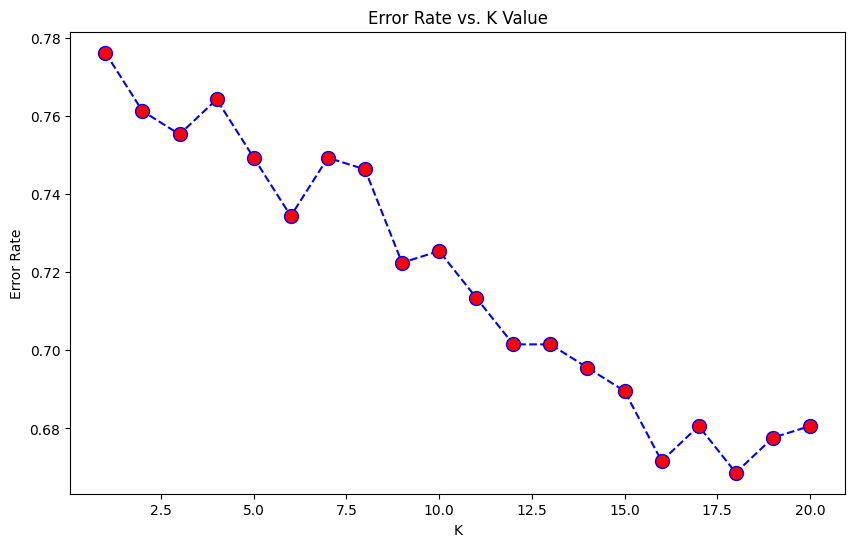

Confusion Matrix:
 [[31 23 21  6]
 [21 25 22 14]
 [19 13 46 13]
 [25 18 29  9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.38      0.35        81
           1       0.32      0.30      0.31        82
           2       0.39      0.51      0.44        91
           3       0.21      0.11      0.15        81

    accuracy                           0.33       335
   macro avg       0.31      0.33      0.31       335
weighted avg       0.31      0.33      0.32       335

Accuracy Score: 0.33134328358208953


In [21]:
# hyperparameter tuning with elbow method
import matplotlib.pyplot as plt
error_rate = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_kpred = knn.predict(X_test_scaled)
    error_rate.append(np.mean(y_kpred != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1, 21), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
# retrain the model with the optimal k value
optimal_k = error_rate.index(min(error_rate)) + 1
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn_optimal.fit(X_train_scaled, y_train)
y_optimal_pred = knn_optimal.predict(X_test_scaled)
# evaluate the optimized model
print('Confusion Matrix:\n', confusion_matrix(y_test, y_optimal_pred))  
print('\nClassification Report:\n', classification_report(y_test, y_optimal_pred))
print('Accuracy Score:', accuracy_score(y_test, y_optimal_pred))


# feature importance

In [ ]:
# feature importance is not applicable for KNN as it is a non-parametric model

# Visualize decision boundaries

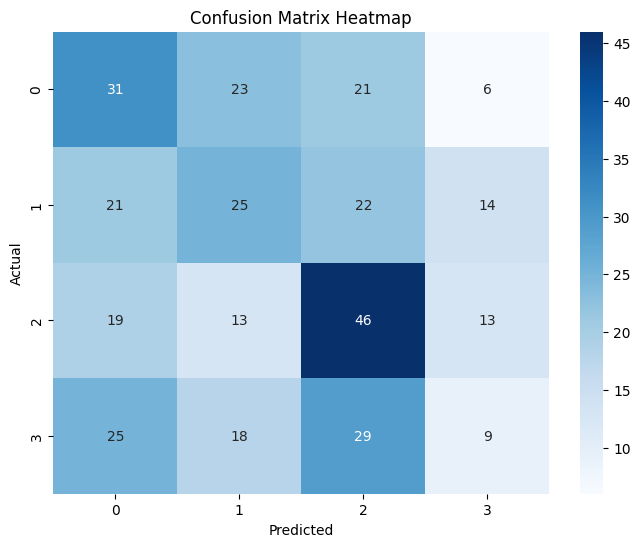

In [22]:
# visualization of results with confusion matrix heatmap
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_optimal_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


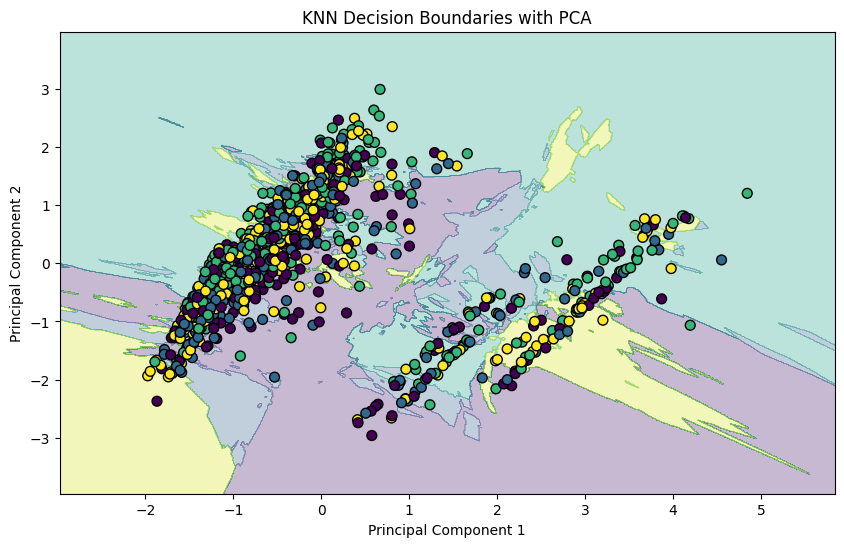

In [23]:
# visualize PCA plot and decision boundaries and KNN decision boundaries
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
knn_pca = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn_pca.fit(X_pca, y_train)
# create a mesh grid for decision boundary visualization
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) 
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolor='k', s=50)
plt.title('KNN Decision Boundaries with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
